# Pymaceuticals Inc.
---

### Analysis

The bar graph showed that Capomulin and Ramicane has the biguest number of mice tested, 
By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 49% female mice and 51% male mice.
The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
The regression analysis helped to understand how much the average tumor volume (y-axix) will change when weight of mice change(x-axix). The R-squared value is  0.709, which means almost 71% of the model fit the data, wich is fairely good to predict the data from the model. 

From the selected treatments Capomulin reduces the size of tumors better.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
Number_mice= len(pd.unique(study_complete["Mouse ID"]))
Number_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = study_complete.loc[study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = study_complete.loc[study_complete["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_df=study_complete[study_complete['Mouse ID'].isin(dup_mice_ID)==False]
unique_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
Number_mice1= unique_mice_df["Mouse ID"].nunique()
Number_mice1

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
study_data = unique_mice_df.set_index(["Drug Regimen"])
group_data = unique_mice_df.groupby("Drug Regimen")
vol_mean=group_data["Tumor Volume (mm3)"].mean()
vol_median=group_data["Tumor Volume (mm3)"].median()
vol_std=group_data["Tumor Volume (mm3)"].std()
vol_sem=group_data["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume":vol_mean, "Median Tumor Volume":vol_median,"STD":vol_std,"SEM":vol_sem})
summary_df.head()


,Mean Tumor Volume,Median Tumor Volume,STD,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_df = study_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

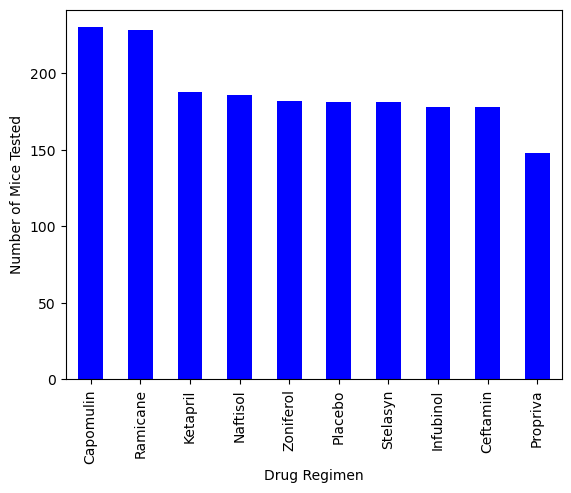

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_and_drugs = unique_mice_df[["Drug Regimen","Timepoint"]]
mice_and_drugs

mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()

mice_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()



In [12]:
mice_and_drugs

,Drug Regimen,Timepoint
0,Ramicane,0
1,Ramicane,5
2,Ramicane,10
3,Ramicane,15
4,Ramicane,20
...,...,...
1888,Naftisol,25
1889,Naftisol,30
1890,Naftisol,35
1891,Naftisol,40


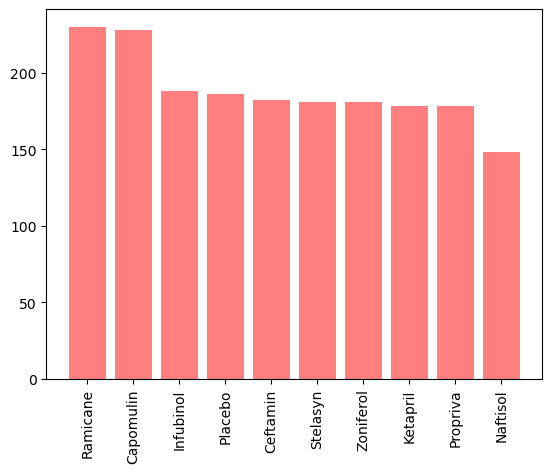

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_and_drugs = unique_mice_df[["Drug Regimen","Timepoint"]]
#x_axis = mice_and_drugs["Drug Regimen"]

#
#plt.ylabel('mice numbers')
#plt.show()

x_axis=mice_and_drugs["Drug Regimen"].unique()
y_axis=mice_and_drugs["Drug Regimen"].value_counts()
#y_axis
plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")
plt.xticks( x_axis, rotation="vertical")
plt.show()

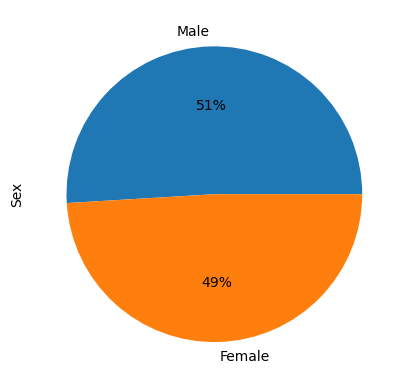

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = unique_mice_df[["Sex","Timepoint"]]
sex=mice_by_sex["Sex"].unique()
count_per_sex = mice_by_sex["Sex"].value_counts()
count_per_sex.plot(kind="pie", autopct="%1.0f%%", ylabel = "Sex")
plt.show()


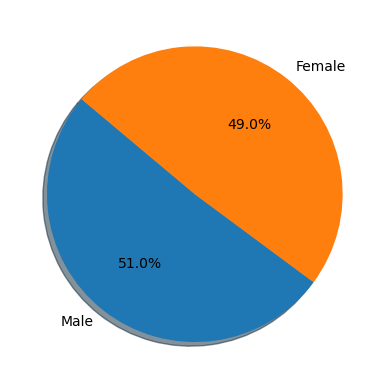

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_by_sex = unique_mice_df[["Sex","Timepoint"]]
#mice_by_sex
sex=mice_by_sex["Sex"].unique()
sex
count_by_sex = mice_by_sex ["Sex"].value_counts()
plt.pie(count_by_sex, labels=sex, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
unique_mice_df.head()
Timepoint_df=unique_mice_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
merged_data= pd.merge(unique_mice_df,Timepoint_df ,how='inner',on=("Mouse ID","Timepoint") )#,"Mouse ID"
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

unique_mice_df1=unique_mice_df.loc[ (unique_mice_df["Drug Regimen"]=="Capomulin")|(unique_mice_df["Drug Regimen"]=="Ramicane")|(unique_mice_df["Drug Regimen"]=="Infubinol")|(unique_mice_df["Drug Regimen"]=="Ceftamin") ]
unique_mice_df1


# Start by getting the last (greatest) timepoint for each mouse

unique_mice_df2=unique_mice_df1.groupby(["Drug Regimen","Mouse ID"]).last()
new_unique_mice_df=unique_mice_df2.reset_index()

new_unique_mice_df
reduced_last_tp=new_unique_mice_df[["Drug Regimen","Mouse ID","Tumor Volume (mm3)"]]
reduced_last_tp.size


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#new_clean_df= pd.merge(unique_mice_df,reduced_last_tp ,how='inner',on=("Drug Regimen") )#,"Mouse ID"
#new_clean_df


300

In [18]:
treatment_ls = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment_ls:
        treatment_ls.append(drug)
treatment_ls 

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [19]:
Ramicane_df=reduced_last_tp.loc[reduced_last_tp["Drug Regimen"]=="Ramicane"]['Tumor Volume (mm3)']
Capomulin_df=reduced_last_tp.loc[reduced_last_tp["Drug Regimen"]=="Capomulin"]['Tumor Volume (mm3)']
Infubinol_df=reduced_last_tp.loc[reduced_last_tp["Drug Regimen"]=="Infubinol"]['Tumor Volume (mm3)']
Ceftamin_df=reduced_last_tp.loc[reduced_last_tp["Drug Regimen"]=="Ceftamin"]['Tumor Volume (mm3)']
#Infubinol_df=new_clean_df.loc[new_clean_df["Drug Regimen"]=="Infubinol"]['Last Volume'].unique()


In [20]:
tum_vol_Ramicane_ls =Ramicane_df.tolist()
tum_vol_Capomulin_ls =Capomulin_df.tolist()
tum_vol_Infubinol_ls =Infubinol_df.tolist()
tum_vol_Ceftamin_ls =Ceftamin_df.tolist()

In [22]:
Ramicane_df.head()

75    38.407618
76    43.047543
77    38.810366
78    32.978522
79    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [31]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_ls = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment_ls:
        treatment_ls.append(drug)
treatment_ls      

# Create empty list to fill with tumor vol data (for plotting)
#tum_vol_Ramicane_ls =Ramicane_df["Tumor Volume (mm3)"]. tolist()
upperq_ls = []
lowerq_ls = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. fo drug in treatment_ls:
#Calculate values for Ramicane
quartiles = Ramicane_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
Ramicane_iqr = upperq-lowerq
upperq_ls.append(upperq)
lowerq_ls.append(lowerq)
print(f"iqr for Ramicane : {Ramicane_iqr }")
lower_bound_Ramicane=lowerq - (1.5*Ramicane_iqr)
upper_bound_Ramicane=upperq + (1.5*Ramicane_iqr)
print(f"values below {lower_bound_Ramicane} could be outliers for Ramicane")
print(f"values above {upper_bound_Ramicane} could be outliers for Ramicane")

#Calculate values for Capomulin

quartiles = Capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
Capomulin_iqr = upperq-lowerq
upperq_ls.append(upperq)
lowerq_ls.append(lowerq)
print(f"iqr for Capomulin : {Capomulin_iqr }")
lower_bound_Capomulin=lowerq - (1.5*Capomulin_iqr)
upper_bound_Capomulin=upperq + (1.5*Capomulin_iqr)
print(f"values below {lower_bound_Capomulin} could be outliers for Capomulin")
print(f"values above {upper_bound_Capomulin} could be outliers for Capomulin")

#Calculate values for Infubinol
quartiles = Infubinol_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
Infubinol_iqr = upperq-lowerq
upperq_ls.append(upperq)
lowerq_ls.append(lowerq)
print(f"iqr for Infubinol : {Infubinol_iqr}")
lower_bound_Infubinol=lowerq - (1.5*Infubinol_iqr)
upper_bound_Infubinol=upperq + (1.5*Infubinol_iqr)
print(f"values below {lower_bound_Infubinol} could be outliers for Infubinol")
print(f"values above {upper_bound_Infubinol} could be outliers for Infubinol")


#Calculate values for Ceftamin
quartiles = Ceftamin_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
Ceftamin_iqr = upperq-lowerq
upperq_ls.append(upperq)
lowerq_ls.append(lowerq)
print(f"iqr for Ceftamin : {Ceftamin_iqr }")
lower_bound_Ceftamin=lowerq - (1.5*Ceftamin_iqr)
upper_bound_Ceftamin=upperq + (1.5*Ceftamin_iqr)
print(f"values below {lower_bound_Ceftamin} could be outliers for Ceftamin")
print(f"values above {upper_bound_Ceftamin} could be outliers for Ceftamin")


upperq_ls   
lowerq_ls
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    #it is done above

iqr for Ramicane : 9.098536719999998
values below 17.912664470000003 could be outliers for Ramicane
values above 54.30681135 could be outliers for Ramicane
iqr for Capomulin : 7.781863460000004
values below 20.70456164999999 could be outliers for Capomulin
values above 51.83201549 could be outliers for Capomulin
iqr for Infubinol : 11.477135160000003
values below 36.83290494999999 could be outliers for Infubinol
values above 82.74144559000001 could be outliers for Infubinol
iqr for Ceftamin : 15.577752179999997
values below 25.355449580000002 could be outliers for Ceftamin
values above 87.66645829999999 could be outliers for Ceftamin


[31.56046955, 32.37735684, 54.04860769, 48.72207785]

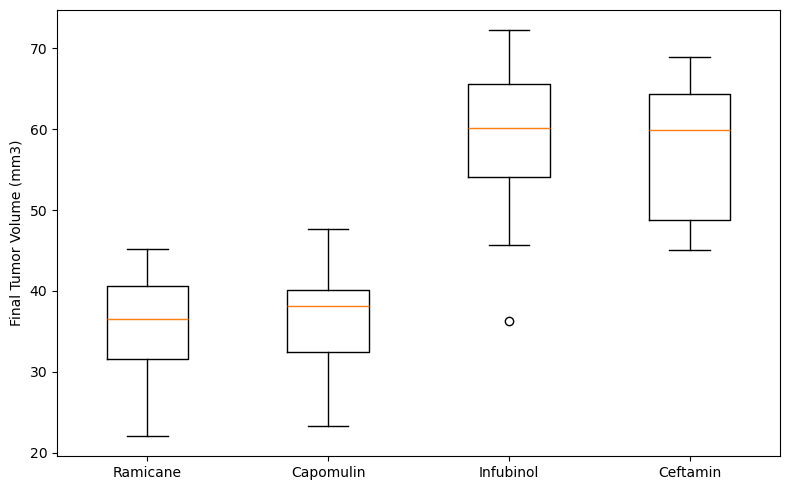

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Set the figure size
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

# Pandas dictionary
data_dict = {"Ramicane": tum_vol_Ramicane_ls, "Capomulin": tum_vol_Capomulin_ls,"Infubinol": tum_vol_Infubinol_ls,"Ceftamin": tum_vol_Ceftamin_ls  }

# Plot the dictionary

fig, ax = plt.subplots()
ax.boxplot(data_dict.values())
ax.set_xticklabels(data_dict.keys())
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [26]:
unique_mice_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


Text(0, 0.5, 'Tumor Volume (mm3)')

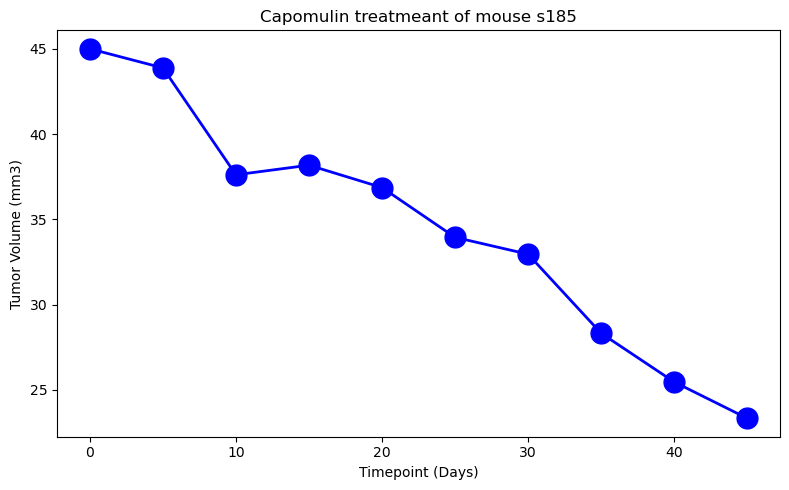

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

onemouse_df=unique_mice_df1.loc[unique_mice_df1["Drug Regimen"]=="Capomulin"]
onemouse_df1=onemouse_df.loc[onemouse_df["Mouse ID"]=="s185"]
onemouse_plot=onemouse_df1[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
onemouse_plot
x_axis=onemouse_plot["Timepoint"]
tumorsize=onemouse_plot["Tumor Volume (mm3)"]

fig2, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, tumorsize ,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

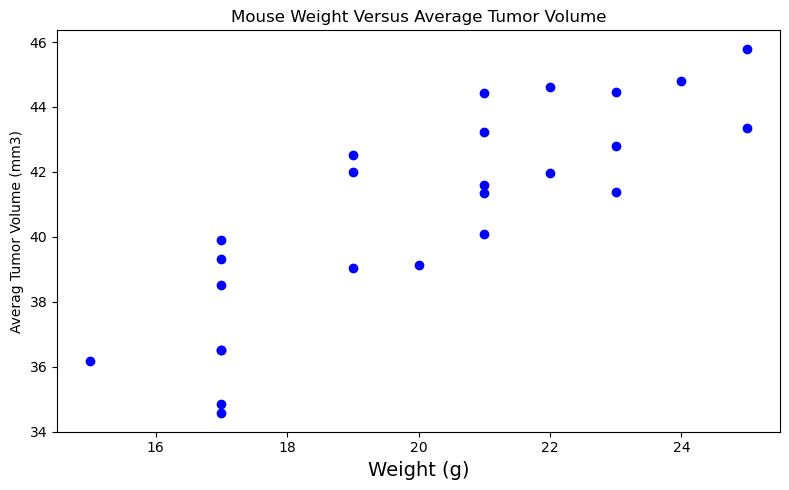

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig3, ax1 = plt.subplots()
Capomulin_df=unique_mice_df1.loc[unique_mice_df1["Drug Regimen"]=="Capomulin"]
Capomulin_df.dtypes
Avg_Capomulin_vol=Capomulin_df.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()
#Avg_Capomulin_w=Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(Avg_Capomulin_vol['Weight (g)'],Avg_Capomulin_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Avg_Capomulin_vol['Weight (g)'],Avg_Capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


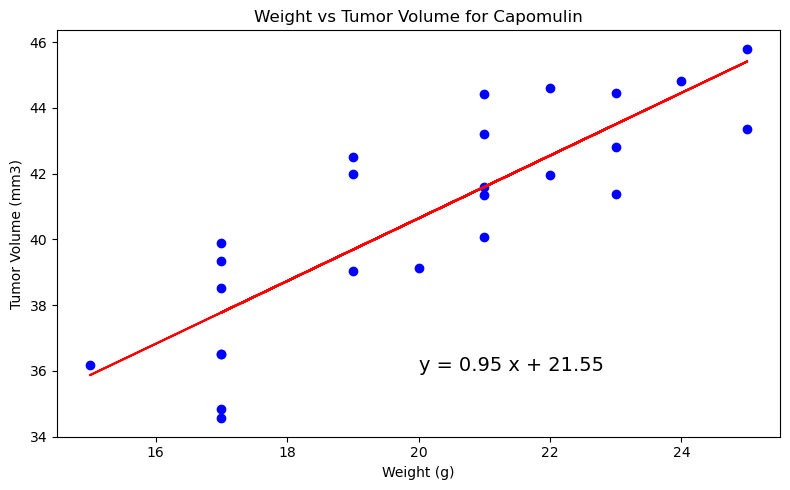

In [63]:
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(Avg_Capomulin_vol["Weight (g)"],Avg_Capomulin_vol["Tumor Volume (mm3)"])
regress_values=Avg_Capomulin_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(Avg_Capomulin_vol["Weight (g)"],Avg_Capomulin_vol["Tumor Volume (mm3)"],color='b')
plt.plot(Avg_Capomulin_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()